# "Building an MNIST Classifier using PyTorch and fastai"
> "Building a handwritten digit classifier using PyTorch and fastai"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter, MNIST, Image Classification, SGD]
- image: images/some_folder/your_image.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

Here I am building a Deep Learning Classifier to classify handwritten digits based on the MNIST dataset. 

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.6MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 194kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 12.5MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 243kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

> Warning: You might need to explcitly specify using fastai V2 on Google Chrome. See https://forums.fast.ai/t/modulenotfounderror-no-module-named-fastai-vision-all-on-kaggle-notebook/77008/13?u=nitinkashyap

After Google Chrome crashed again, I moved to Brave Browser and didn't have this issue again



Quite pissed that I ran into some issues in the import statement itself. After some googling in the fastai forums, I found that apparently the fastai version (v2) needs to be explicitly defined. Somehow the notebooks used in the course circumvents this. Anyway glad to have found the answer within a few minutes of googling. If you have this error just follow this: https://forums.fast.ai/t/modulenotfounderror-no-module-named-fastai-vision-all-on-kaggle-notebook/77008/13?u=nitinkashyap

EDIT: Wrote the above part and then Colab on Google chrome crashed for the umpteenth time. I moved to Brave Browser and the original code works perfectly. Guess there was some issue with Google Chrome.

In [3]:
#hide
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

I absolutely love how fastai has managed to improve the readability of python and provide such small elegant functions that used to be a pain for me to create on python jupyter notebooks before. Usually had about three or four lines of code that just set the input and output paths before. Using the untar_data to basically download the data from fastai's AWS S3 on to the working directory and decompress this. this function returns the path of the extracted files. SO SO Elegant!

In [4]:
#hide
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

Another nifty little thing fastai has provided is to access the working directory directly on jupyter books using path.ls() 

```
path.ls() 
```

I remember toggling back and forth between the terminal and the jupyter notebook while working before. It's the little things like this that let you focus on the deep learning part of the process. 

Big thanks to the fastai team for including so many such features.

In [5]:
#hide
path.ls()

(#2) [Path('training'),Path('testing')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation set (and/or test set). Let's see what's inside the training set:

In [6]:
(path/'testing').ls()

(#10) [Path('testing/5'),Path('testing/1'),Path('testing/7'),Path('testing/3'),Path('testing/0'),Path('testing/6'),Path('testing/8'),Path('testing/4'),Path('testing/9'),Path('testing/2')]

In [7]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/1'),Path('training/7'),Path('training/3'),Path('training/0'),Path('training/6'),Path('training/8'),Path('training/4'),Path('training/9'),Path('training/2')]

There are separate folders for inages of each of the 10 digits. Usually, without having any pre-defined functions to read in the data, we would have to read in the files using something like 

```
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
zeros = (path/'training'/'0').ls().sorted()
```

This is cumbersome and might lead to some inadverent errors while writing the lines of code for each separate category of image. This would be even more painful if the number of categories increases. 


> Tip: Use the inbuilt DataLoaders(ImageDataLoaders, TextDataLoaders, etc.) classes to easily import data.

Fortunately, fastai also has an inbuilt ImageDataLoaders class that helps us easily import the required files and also automatically assign the labels. 

In [8]:
#hide
doc(ImageDataLoaders)

Here I am deciding to import the files in the training set only. I will be creating a validaton dataset using 25% of the data and then testing the model on the testing dataset once I a happy with the model's performance.

In [9]:
dls = ImageDataLoaders.from_folder(path=path/'training', valid_pct=0.25)

Let's take a look at these images to make sure the ImageDataLoaders method is doing what we expect it to do.

In [10]:
dls.train_ds.items[:3]

[Path('training/0/662.png'),
 Path('training/1/22555.png'),
 Path('training/2/38070.png')]

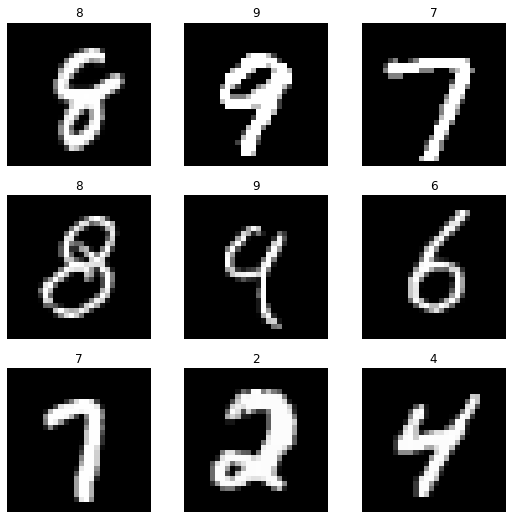

In [11]:
dls.show_batch()

In [47]:
img = Image.open(dls.train_ds.items[0])

In [48]:
img.shape

(28, 28)

### Using fullblown fastai
Fastai has made it possible to create a deep learning model using just two lines of code and give an oner 95% accuracy within a few minutes. 

In [13]:
#hide
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.126335,0.078900,0.980333,01:39


While this is really elegant and easy to use, I am still new to many of these concepts and the whole point of this blog post is for me to build a learner from scratch and use as few of these consolidated functions as possible. So I will explore this below and hopefully be able to achieve a comparable performance. 

In [41]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.summary()


Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      

###Starting the modelling
So the first step now would be to decide the structure of the Neural Network,  initialize the weights and define the loss function. I am deciding to use {{nn.Sequential}} to create a three layer neural network and then see what happens if we use another layer and see if it matters if the layer is a linear unit or a ReLU.


Using a Sigmoid function that converts any output to a value between 0 and 1 to create our loss function.

In [58]:
learn = Learner(dls, resnet50, 
                loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

AttributeError: ignored

AttributeError: ignored

IndexError: ignored

In [15]:
threeLayerNet = nn.Sequential(nn.Linear(28*28, 40),
                              nn.ReLU(),
                              nn.Linear(40,1))

fourLayerNet1 = nn.Sequential(nn.Linear(28*28, 40),
                              nn.ReLU(), nn.ReLU(),
                              nn.Linear(40,1))

fourLayerNet2 = nn.Sequential(nn.Linear(28*28, 256),
                              nn.Linear(256, 40), nn.ReLU(),
                              nn.Linear(40,10))


In [17]:
learn = Learner(dls, threeLayerNet, opt_func=SGD,
                loss_func=F.cross_entropy, metrics=accuracy)

In [57]:

dls.train_ds.items[:3]

[Path('training/8/25379.png'),
 Path('training/5/31053.png'),
 Path('training/5/24180.png')]

In [58]:
dls.valid_ds.items[:4]

[Path('training/2/13925.png'),
 Path('training/2/1660.png'),
 Path('training/2/45158.png'),
 Path('training/9/25083.png')]

In [60]:
xb, yb = first(dls)
xb.shape, yb.shape

ValueError: ignored

In [ ]:
doc(cnn_)

In [27]:
#hide
zero_tensors = [tensor(Image.open(o)) for o in zeros]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]


flat_zeros = [o.flatten().float()/255 for o in zero_tensors]
flat_ones = [o.flatten().float()/255 for o in one_tensors]
flat_twos = [o.flatten().float()/255 for o in two_tensors]
flat_threes = [o.flatten().float()/255 for o in three_tensors]
flat_fours = [o.flatten().float()/255 for o in four_tensors]
flat_fives = [o.flatten().float()/255 for o in five_tensors]
flat_sixes = [o.flatten().float()/255 for o in six_tensors]
flat_sevens = [o.flatten().float()/255 for o in seven_tensors]
flat_eights = [o.flatten().float()/255 for o in eight_tensors]
flat_nines = [o.flatten().float()/255 for o in nine_tensors]

train_x = torch.cat([torch.stack(flat_zeros), 
                     torch.stack(flat_ones), 
                     torch.stack(flat_twos), 
                     torch.stack(flat_threes), 
                     torch.stack(flat_fours), 
                     torch.stack(flat_fives), 
                     torch.stack(flat_sixes), 
                     torch.stack(flat_sevens), 
                     torch.stack(flat_eights), 
                     torch.stack(flat_nines)]).view(-1, 28*28)

train_y = tensor([0]*len(zeros)+ 
                 [1]*len(ones)+
                 [2]*len(twos)+
                 [3]*len(threes)+
                 [4]*len(fours)+
                 [5]*len(fives)+
                 [6]*len(sixes)+
                 [7]*len(sevens)+
                 [8]*len(eights)+
                 [9]*len(nines)).unsqueeze(1)

In [28]:
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [29]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([0]))

In [18]:
eight_tensors[10]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 162, 2

Doing the same for the testing data

In [ ]:
#hide

ones_test = (path/'testing'/'1').ls().sorted()
twos_test = (path/'testing'/'2').ls().sorted()
threes_test = (path/'testing'/'3').ls().sorted()
fours_test = (path/'testing'/'4').ls().sorted()
fives_test = (path/'testing'/'5').ls().sorted()
sixes_test = (path/'testing'/'6').ls().sorted()
sevens_test = (path/'testing'/'7').ls().sorted()
eights_test = (path/'testing'/'8').ls().sorted()
nines_test = (path/'testing'/'9').ls().sorted()
zeros_test = (path/'testing'/'0').ls().sorted()


zero_tensors_test = [tensor(Image.open(o)) for o in zeros_test]
one_tensors_test = [tensor(Image.open(o)) for o in ones_test]
two_tensors_test = [tensor(Image.open(o)) for o in twos_test]
three_tensors_test = [tensor(Image.open(o)) for o in threes_test]
four_tensors_test = [tensor(Image.open(o)) for o in fours_test]
five_tensors_test = [tensor(Image.open(o)) for o in fives_test]
six_tensors_test = [tensor(Image.open(o)) for o in sixes_test]
seven_tensors_test = [tensor(Image.open(o)) for o in sevens_test]
eight_tensors_test = [tensor(Image.open(o)) for o in eights_test]
nine_tensors_test = [tensor(Image.open(o)) for o in nines_test]

flat_zeros_test = [o.flatten().float()/255 for o in zero_tensors_test]
flat_ones_test = [o.flatten().float()/255 for o in one_tensors_test]
flat_twos_test = [o.flatten().float()/255 for o in two_tensors_test]
flat_threes_test = [o.flatten().float()/255 for o in three_tensors_test]
flat_fours_test = [o.flatten().float()/255 for o in four_tensors_test]
flat_fives_test = [o.flatten().float()/255 for o in five_tensors_test]
flat_sixes_test = [o.flatten().float()/255 for o in six_tensors_test]
flat_sevens_test = [o.flatten().float()/255 for o in seven_tensors_test]
flat_eights_test = [o.flatten().float()/255 for o in eight_tensors_test]
flat_nines_test = [o.flatten().float()/255 for o in nine_tensors_test]

test_x = torch.cat([torch.stack(flat_zeros_test), 
                     torch.stack(flat_ones_test), 
                     torch.stack(flat_twos_test), 
                     torch.stack(flat_threes_test), 
                     torch.stack(flat_fours_test), 
                     torch.stack(flat_fives_test), 
                     torch.stack(flat_sixes_test), 
                     torch.stack(flat_sevens_test), 
                     torch.stack(flat_eights_test), 
                     torch.stack(flat_nines_test)])

test_y = tensor([0]*len(zeros_test)+ 
                 [1]*len(ones_test)+
                 [2]*len(twos_test)+
                 [3]*len(threes_test)+
                 [4]*len(fours_test)+
                 [5]*len(fives_test)+
                 [6]*len(sixes_test)+
                 [7]*len(sevens_test)+
                 [8]*len(eights_test)+
                 [9]*len(nines_test))

### Building the Baseline Model: KNN

One of the things emphasized in the fastai course is the need to first create a baseline model. Having an accuracy of over 90% means nothing if a simple arithmetic model has an accuracy of 95%. I have also created many fancy machine learning models only to find that using a simpler model performed far better. A model is useless if it fails to beat a simple benchmark. While it's tempting to rush in and start writing in some fancy code, it might be a good idea to create a simple baseline model to assess the quality of the model's accuracy. Here is the description of a Baseline model from the fastai course:

> jargon: Baseline: A simple model which you are confident should perform reasonably well. It should be very simple to implement, and very easy to test, so that you can then test each of your improved ideas, and make sure they are always better than your baseline. Without starting with a sensible baseline, it is very difficult to know whether your super-fancy models are actually any good. One good approach to creating a baseline is doing what we have done here: think of a simple, easy-to-implement model. Another good approach is to search around to find other people that have solved similar problems to yours, and download and run their code on your dataset. Ideally, try both of these!

As the MNSIT I am trying to do is a bit more complex than the sample MNSIT example in lesson 4 of the course. I am going to try and build a simple KNN Classifier and see how well this performs and hopefully should be able to get a better result using Deep Learning. This will also give me an opportunity of using Tensors to build a KNN



In [ ]:
def euc_dist(x1, x2):
  return torch.sqrt(torch.sum((x1-x2)**2))

This script will need a way to create X and Y datasets

In [ ]:
#hide


In [ ]:
#hide


Doing the same for the testing data

Running the model to check the results. Got a first hand understanding of how slow the computation is because of the loops

In [ ]:
class KNN:
    def __init__(self, K=3):
        self.K=3
  
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.y_train = y_train
  
    def old_predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            #dist = torch.tensor([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            dist = torch.tensor([torch.dist(X_test[i], x_t, p=2) for x_t in self.X_train])
            dist_sorted = torch.argsort(dist)[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.y_train[idx] in neigh_count:
                    neigh_count[self.y_train[idx]] += 1
                else:
                    neigh_count[self.y_train[idx]] = 1

            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions       

        def predict(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            #dist = torch.tensor([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            dist = torch.tensor([torch.dist(X_test[i], x_t, p=2) for x_t in self.X_train])
            dist_sorted = torch.argsort(dist)[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.y_train[idx] in neigh_count:
                    neigh_count[self.y_train[idx]] += 1
                else:
                    neigh_count[self.y_train[idx]] = 1

            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions       

In [ ]:
model = KNN(K=3)
model.fit(train_x, train_y)
pred = model.predict(test_x)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)



In [ ]:
test_y[:100]


In [ ]:
print(len(three_tensors))
print(three_tensors[0].shape)

In [ ]:
three_tensors[0]

In [ ]:
len(three_tensors[0].flatten())